# 캘리포니아 주택 가격 예측 모델 만들기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## 1. 데이터 가져오기

In [2]:
# pandas를 활용해 csv 파일 읽어오기
housing = pd.read_csv('../datasets/housing.csv')

## 2. 데이터 훑어보기

row는 한집, 한집 수치가 아닌 구역별 수치를 나타낸다.

In [3]:
# '최상단' 5개의 데이터 읽어오기 -> default 값이 5로 되어있어 5개 출력  -> 갯수 지정 가능
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# '최하단' 5개의 데이터 읽어오기 -> default 값이 5로 되어있어 5개 출력  -> 갯수 지정 가능
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
# housing을 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# 'ocean_proximity' 내에 존재하는 각각의 값의 개수
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# housing 데이터의 컬럼별 통계량 출력 / 수치형 데이터만 출력
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


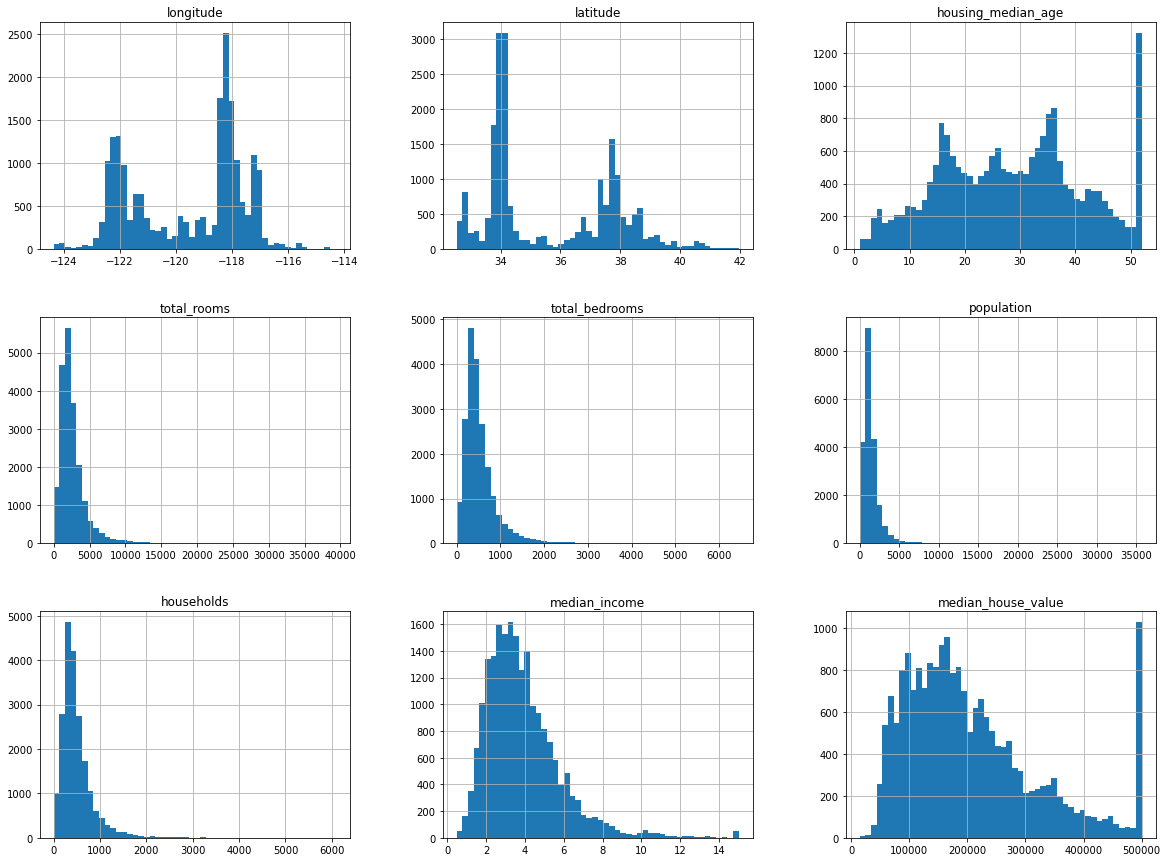

In [8]:
# housing 데이터를 히스토그램으로 보기
h = housing.hist(bins=50, figsize=(20, 15))

## 3. 데이터 세트 분리
- 훈련 데이터/ 테스트 데이터

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# median_incom이 주택 가격을 예측하는데 중요한 특성이다 가정
# 훈련데이터와 테스트 데이터를 나눌 때 이 소득의 비율이 그대로 반영되게 하자

# 계층적 샘플링을 위해 범주형 데이터로 변형
# median_incom 값 : 0 ~ 14
bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf]  # np.inf : 무한대라는 의미 | median_incom 값의 끝 범위
labels = [1, 2, 3, 4, 5] # 범주 이름 설정
housing["income_cate"] = pd.cut(housing['median_income'], bins= bins, labels=labels)

In [11]:
# 소득(median_incom)의 계층 
housing["income_cate"].value_counts() # 계층별로 빈도수 출력

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cate, dtype: int64

In [12]:
len(housing)

20640

In [13]:
housing["income_cate"].value_counts() / len(housing) # 상대도수

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cate, dtype: float64

In [14]:
# 1. 무작위 추출
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
# 2. 계층적 샘플링
strat_train_set, strat_test_set = train_test_split(housing, stratify= housing["income_cate"], test_size=0.2, random_state=42)

비율 알아보기

In [16]:
# 계층적 샘플링 했을 때는 income_cate 상대 도수가 흡사하게 반영이 되어 있음
strat_test_set['income_cate'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cate, dtype: float64

In [17]:
# 무작위 샘플링 했을 때는 income_cat 상대 도수가 잘 반영되어 있지 않음
test_set['income_cate'].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cate, dtype: float64

In [18]:
# 이미 median_income 값이 있는데
# 'income_cate' 상대도수를 구하기 위해 임시적으로 사용했기 때문에 'income_cate'는 삭제
strat_train_set.drop('income_cate', axis=1, inplace=True)  #  axis=1 : 열   | inplace=True : 원본 반영
strat_test_set.drop('income_cate', axis=1, inplace=True)

In [19]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

## 4. 데이터 탐색

**탐색적 데이터분석**
- 어떤 특성을 선택할지, 제거할지, 조합을 통해서 더 좋은 특성을 만들 수 있는지를 분석
- 시각화(데이터의 경향성, 왜곡, 특잇값, 통계적정보)
- 상관관계, 누락데이터(결측치)를 종합적으로 분석
- 탐색적 데이터 분석의 결과로 모델링 방향을 결정할 수 있음

In [20]:
housing = strat_train_set.copy()

### 4.1 지리적 데이터 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

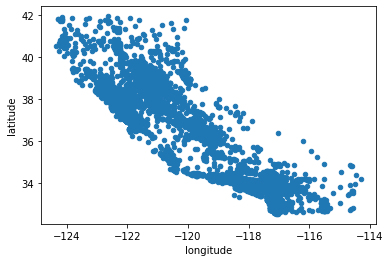

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude') # longitude(경도) : 동서, # latitude(위도): 남북

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

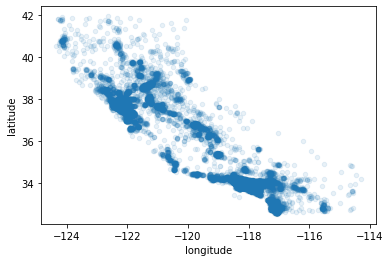

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1) # alpha: 투명도 조절

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

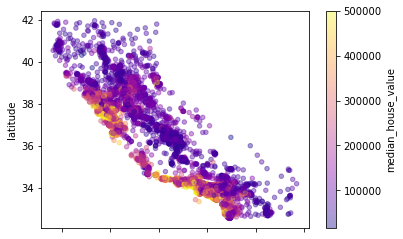

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, # alpha: 투명도 조절
             c = 'median_house_value', cmap='plasma') # color를 통해서 주택가격의 높고 낮음을 알 수 있음
            # c = 컬럼명, cmap = 컬러명

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

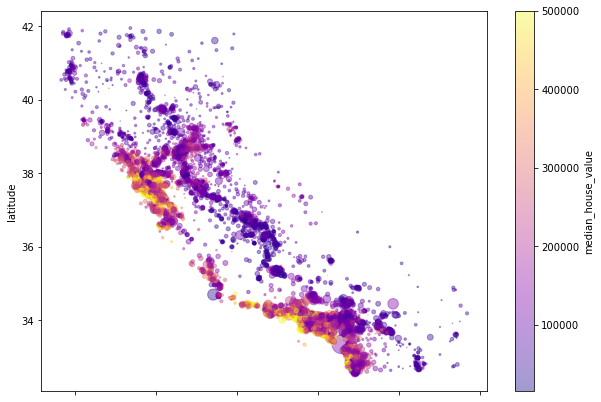

In [24]:
housing.plot( kind='scatter', x='longitude', y='latitude', alpha=0.4, # alpha: 투명도 조절
              c = 'median_house_value', cmap='plasma', # color를 통해서 주택가격의 높고 낮음을 알 수 있음
              s = housing['population']/100, figsize=(10, 7) # size를 통해서 인구정보를 알 수 있음 
            ) # s : 지름 
            
    
# -> 지름이 큰 원은 인구가 많다는걸 의미하고 노란색,붉은 색에 가까울 수록 주택 가격이 높다는걸 알 수 있다.

- 해안가이면서 밀집지역일수록 주택 가격이 높음

### 4.2 상관관계 조사

- 상관계수

In [25]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- 산점도

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

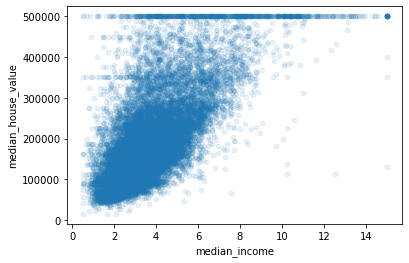

In [26]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### 4.3 특성 조합을 실험

In [27]:
# total_rooms / households 가구당 방의 개수
# total_bedrooms / total_rooms 전체 방에서 침실방의 비율
# population / households 가구당 인구수

In [28]:
housing["rooms_per_household"] = housing['total_rooms'] / housing['households']
housing["bedrooms_per_rooms"] = housing['total_bedrooms'] / housing['total_rooms']
housing["population_per_household"] = housing['population'] / housing['households']

In [29]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

## 5. 데이터 전처리

In [30]:
housing = strat_train_set.drop('median_house_value', axis=1) # 특성 (X)
housing_label = strat_train_set['median_house_value'].copy() # 레이블 (y)

### 5.1 데이터 전처리(1) - 결손값 처리

### 5.1.1 pandas

In [31]:
sample_incomplete_row = housing[housing.isnull().any(axis=1)].head()

**[option 1]** null이 있는 <u>행(샘플)</u>을 삭제

In [32]:
sample_incomplete_row.dropna(axis=0) # 행을 삭제

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


**[option 2]** null이 있는 <u>열(특성)</u>을 삭제

In [33]:
sample_incomplete_row.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


**[option 3 ]** null값을 <u>다른 값으로</u>  대체

In [34]:
median = housing['total_bedrooms'].median()
median

433.0

In [35]:
sample_incomplete_row.fillna(median)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


### 5.1.2 scikit-learn

In [36]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [37]:
# 수치형 데이터의 누락된 값을 처리해주는 scikit-learn 변환기
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy='median') # 변환기 객체 생성  | strategy : 평균값
imputer.fit(housing_num) # 변환할 준비 : 중앙값을 구함

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_  # 확인

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [40]:
X = imputer.transform(housing_num) # 실제 변환
X # ndarray

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [41]:
housing_num_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
housing_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [42]:
housing_num_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [43]:
sample_incomplete_row.index

Int64Index([1606, 10915, 19150, 4186, 16885], dtype='int64')

In [44]:
housing_num_tr.loc[sample_incomplete_row.index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


### 5.2 데이터 전처리(2) - 데이터 인코딩
- 숫자데이터로 변환
- 데이터 인코딩을 하는 이유는 머신러닝에서 수치값만 기대하기 때문

In [45]:
# 변환하기 쉽게 2차원으로 
housing_cate = housing[['ocean_proximity']]  

#### (1) 레이블 인코딩
- 문자열 카테고리 값을 숫자형 카테고리 값으로 변환

   참고) inverse_transform = 라벨링을 다시 문자열(기존 값)로 바꿔 줌

In [46]:
housing_cate.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

pandas로 실행한다면
- pd.factorize() 는 2가지 값을 반환한다.
- 첫번째 값은 정수로 인코딩된 값(array), 두번째 값은 인코딩된 범주(index)

In [47]:
pd.factorize(housing['ocean_proximity'])

(array([0, 1, 0, ..., 2, 2, 0], dtype=int64),
 Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object'))

scikit-learn 변환기 실행

In [48]:
from sklearn.preprocessing import OrdinalEncoder # LabelEncoder 는 1차원 데이터를 기대

ordinal_encoder = OrdinalEncoder() # 객체 생성
# ordinal_encoder.fit(housing_cate) # 준비
# ordinal_encoder.transform(housing_cate) # 변환
housing_cate_encoded = ordinal_encoder.fit_transform(housing_cate) # 준비와 변환을 한꺼번에
housing_cate_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

#### (2) 원핫 인코딩
- 행 형태의 피처값을 열 형태로 변환한 뒤 피처값 인덱스에 해당하는 컬럼에는 1로 표시하고
  나머지 칼럼에는 0으로 표시하는 방식

In [49]:
# pandas
pd.get_dummies(housing_cate)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12655,0,1,0,0,0
15502,0,0,0,0,1
2908,0,1,0,0,0
14053,0,0,0,0,1
20496,1,0,0,0,0
...,...,...,...,...,...
15174,1,0,0,0,0
12661,0,1,0,0,0
19263,1,0,0,0,0
19140,1,0,0,0,0


In [50]:
# scikit-learn 변환기
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
housing_cate_encoded = onehot_encoder.fit_transform(housing_cate)
housing_cate_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [51]:
# sparse matrix 일 경우에 toarray()로 확인
housing_cate_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [81]:
onehot_encoder = OneHotEncoder(sparse=False)  # sparse=False 넣었을경우 toarray로 값을 확인 할 필요 없이 바로 확인 가능
housing_cate_encoded = onehot_encoder.fit_transform(housing_cate)
housing_cate_encoded

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [52]:
# 어떤 카테고리인지 확인
onehot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 5.3 데이터 전처리(3) - 특성 스케일링
- 표준화 (Z score Standardize) : 평균 0, 표준편차 1
- 정규화 (Min Max Scaling) : 0~1 사이로 정규화 (참고 : 특잇값에 영향을 받음)
- 로그 스케일링 : 데이터의 분포가 왜곡되어 있을때 주로 사용

In [53]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [54]:
Z_arr = (arr - arr.mean())/(arr.std())
Z_arr.mean(), Z_arr.std() # 평균 0, 표준편차1

(0.0, 1.0)

In [55]:
M_arr = (arr - arr.min())/(arr.max() - arr.min())
M_arr.min(), M_arr.max() #  최소 0, 최대 1


(0.0, 1.0)

In [56]:
# pandas
# 표준화 : 평균 0, 표준편차 1
def zscore_standardize(arr):
    return (arr - arr.mean())/arr.std()

# 정규화
def minmax_scaling(arr):
    return (arr - arr.min())/(arr.max() - arr.min())

In [57]:
housing_num.apply(zscore_standardize) # 수치 데이터에 표준화 적용

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941322,1.347397,0.027563,0.584760,0.635103,0.732580,0.556269,-0.893620
15502,1.171747,-1.192404,-1.721965,1.261428,0.775653,0.533595,0.721296,1.292129
2908,0.267573,-0.125968,1.220423,-0.469759,-0.545029,-0.674655,-0.524391,-0.525418
14053,1.221701,-1.351433,-0.370057,-0.348641,-0.038565,-0.467603,-0.037296,-0.865903
20496,0.437418,-0.635799,-0.131485,0.427167,0.269190,0.374049,0.220892,0.325742
...,...,...,...,...,...,...,...,...
15174,1.251674,-1.220468,-1.165297,1.890398,1.686802,0.543455,1.341478,0.637354
12661,-0.921340,1.342720,-1.085773,2.468396,2.149647,3.002083,2.451418,-0.557492
19263,-1.570747,1.309979,1.538519,-0.895775,-0.893980,-0.861987,-0.865092,-0.365464
19140,-1.560756,1.249173,-1.165297,0.248997,0.109254,-0.189741,0.010615,0.168256


In [58]:
housing_num.apply(minmax_scaling) # 수치 데이터에 정규화 적용

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617
...,...,...,...,...,...,...,...,...
15174,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554
12661,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584
19263,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811
19140,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928


In [59]:
# scikit-learn 변환기 사용
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()  # MinMaxScaler도 동일하게 사용 가능
housing_num_standardized = std_scaler.fit_transform(housing_num)
housing_num_standardized.mean(), housing_num_standardized.std() # 0, 1

# -> null 값이 존재해서 nan이 출력

(nan, nan)

In [60]:
housing_num_standardized.mean(0), housing_num_standardized.std(0) # 0번축으로 

(array([-5.24924634e-15,  2.81159678e-16,  8.77850764e-17, -1.54914841e-17,
                    nan,  6.45478503e-19, -1.05428155e-17,  1.14841384e-16]),
 array([ 1.,  1.,  1.,  1., nan,  1.,  1.,  1.]))

### 5.4 데이터 전처리(4) - 변환 파이프라인


**나만의 변환기**

1. 아래 형식을 그대로 가져가기
```
class 나만의변환기(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # todo
```        
2. transform 함수 위주로 코드를 채우기

3. 변환기 초기 값이 필요하다면 ```__init__ ```함수 채우기 <br>
   변환 준비를 해야 한다면 fit() 함수 채우기


In [61]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix = 3
bedrooms_ix = 4
population_ix = 5
households_ix = 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X): # pipeline 사용시에는 상위 변환기에서 전달해준 데이터(ndarray)
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]        
        bedrooms_per_rooms = X[:, bedrooms_ix]/X[:, rooms_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        
        return np.c_[X, rooms_per_household, bedrooms_per_rooms, population_per_household]
                # np.c_ :  nd_array가 옆으로 나열 |  np.r_ : row
    
# dataframe이 입력을 들어왔을 때
#         X["rooms_per_household"] = X['total_rooms'] / X['households']
#         X["bedrooms_per_rooms"] = X['total_bedrooms'] / X['total_rooms']
#         X["population_per_household"] = X['population'] / X['households']
#        return X

In [63]:
# adder = CombinedAttributesAdder()
# test = adder.fit_transform(housing_num)

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
# 수치형 특성 : 파이프라인
num_pipeline = Pipeline([
                   ("imputer", SimpleImputer(strategy='median')), # 누락된 값을 대체 하는 변환기
                   ("attrbs_adder", CombinedAttributesAdder()),
                   ("std_scaler", StandardScaler()), # 특성 스케일링 (표준화)    
               ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [66]:
housing_num_tr.mean(), housing_num_tr.std()

(-4.0479326100453865e-16, 1.0)

In [67]:
# 범주형 특성 : 변환기
# ohe_encoder = OneHotEncoder()
# housing_cat_encoded = ohe_encoder.fit_transform(housing_cat)

In [68]:
from sklearn.compose import ColumnTransformer

In [131]:
housing_num.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [132]:
num_attrib = list(housing_num.columns.values)
cate_attrib = ['ocean_proximity']

In [133]:
full_pipeline = ColumnTransformer([
                    ("num", num_pipeline, num_attrib), # 수치형 데이터  (변환기 이름. 파이프라인(변환기), 수치형 데이터의 컬럼)
                    ("cate", OneHotEncoder(), cate_attrib)  # 범주형 데이터  (변환기 이름. 파이프라인(변환기), 범주형 데이터의 컬럼)
                ])
housing_prepared = full_pipeline.fit_transform(housing)
# 컬럼명(num_attrib, cate_attrib)이 다 들어가있어서 전체 데이터인 'housing'을 넣어주면 됨

In [134]:
housing.shape

(16512, 9)

In [135]:
housing_prepared.shape

(16512, 16)

In [136]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## 6. 모델 선택과 훈련

In [75]:
# housing_prepared : X_train, housing_label : y_train

### 6.1 잘못된 방법

In [76]:
# 아래 두 모델에 대해 훈련데이터로 예측을 한 뒤 MSE/RMSE 로 측정함
# 1. 선형회귀 모델:
# --> (4709829587.971121, 68628.19819848923)
# 2. 결정트리 모델:
# ---> (0.0, 0.0)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [79]:
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score # R2

In [82]:
housing_predict = lin_reg.predict(housing_prepared)

In [83]:
housing_prepared.shape, housing_predict.shape

((16512, 16), (16512,))

In [84]:
lin_mse = mean_squared_error(housing_label, housing_predict)
lin_rmse = mean_squared_error(housing_label, housing_predict, squared=False)

In [85]:
lin_mse, lin_rmse

(4709785076.060029, 68627.87390018745)

In [86]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [87]:
housing_predict = tree_reg.predict(housing_prepared)

In [88]:
tree_mse = mean_squared_error(housing_label, housing_predict)
tree_rmse = mean_squared_error(housing_label, housing_predict, squared=False)

In [89]:
tree_mse, tree_rmse

(0.0, 0.0)

### 6.2 교차검증

In [90]:
# 아래 두 모델에 대해 교차 검증으로 RMSE를 측정
# 1. 선형회귀 모델:
# --> 69052.46136345084
# 2. 결정트리 모델:
# ---> 71195.05393557178

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
lin_reg = LinearRegression()

In [93]:
scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)

In [94]:
scores # 10개의 neg_mean_squared_error

array([-5.14989425e+09, -4.11073216e+09, -4.59293165e+09, -4.71078941e+09,
       -4.46840655e+09, -5.26031619e+09, -5.47556792e+09, -4.73376148e+09,
       -4.41471057e+09, -4.91959144e+09])

In [95]:
-scores # 10개의 mean_squared_error

array([5.14989425e+09, 4.11073216e+09, 4.59293165e+09, 4.71078941e+09,
       4.46840655e+09, 5.26031619e+09, 5.47556792e+09, 4.73376148e+09,
       4.41471057e+09, 4.91959144e+09])

In [96]:
np.sqrt(-scores) # 10개의 root_mean_squared_error

array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
       66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
       66443.28836884, 70139.79923956])

In [97]:
np.sqrt(-scores).mean() # 10개의 rmse의 평균

69104.07998247063

In [98]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [99]:
scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)

In [100]:
np.sqrt(-scores).mean() # 10개의 rmse의 평균

71444.17827643351

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
forest_reg = RandomForestRegressor(random_state=42)
%time scores = cross_val_score(forest_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

Wall time: 36 s


array([51425.78894761, 48686.43325001, 47126.63706616, 51936.6539622 ,
       47513.47437032, 51822.56627035, 52456.70398283, 50099.3119716 ,
       48676.30035937, 54337.82787921])

In [103]:
forest_rmse_scores.mean()

50408.16980596742

## 7. 모델 세부 튜닝

### 7.1 그리드 탐색

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
forest_reg = RandomForestRegressor(random_state=42)
param_grid = [{'n_estimators' : [30, 50, 100], 'max_features' : [2, 4, 6, 8]}, # 3 * 4
              {'bootstrap' : [False], 'n_estimators' : [30, 50, 100], 'max_features' : [2, 4, 6, 8]}] # 3 * 4

grid_serach = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # 24 * 5 = 100
%time grid_serach.fit(housing_prepared, housing_label)

Wall time: 1min 55s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 50, 100]}],
             scoring='neg_mean_squared_error')

In [106]:
grid_serach.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 100}

In [107]:
cvres = grid_serach.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

52917.6641920337 {'max_features': 2, 'n_estimators': 30}
52224.06617621752 {'max_features': 2, 'n_estimators': 50}
51799.41536991128 {'max_features': 2, 'n_estimators': 100}
50660.36768324297 {'max_features': 4, 'n_estimators': 30}
50010.59437153187 {'max_features': 4, 'n_estimators': 50}
49727.3119332185 {'max_features': 4, 'n_estimators': 100}
50030.31500370757 {'max_features': 6, 'n_estimators': 30}
49467.396629307885 {'max_features': 6, 'n_estimators': 50}
49204.32111792171 {'max_features': 6, 'n_estimators': 100}
49941.73466161617 {'max_features': 8, 'n_estimators': 30}
49654.92154680024 {'max_features': 8, 'n_estimators': 50}
49309.161700461926 {'max_features': 8, 'n_estimators': 100}
52128.048789829445 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
51372.727814770544 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
50947.32878676324 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
49718.08141423825 {'bootstrap': False, 'max_features': 4, 'n_es

In [108]:
final_model = grid_serach.best_estimator_

In [109]:
feature_importances = final_model.feature_importances_

In [110]:
num_attribs = list(housing_num.columns.values)
extra_attribs = ['rooms_per_household', 'bedrooms_per_rooms', 'population_per_household']
cat_attib = ['ocean_proximity1', 'ocean_proximity2', 'ocean_proximity3', 'ocean_proximity4', 'ocean_proximity5']

total_attib = num_attribs + extra_attribs + cat_attib
len(total_attib)

16

In [111]:
final_model.feature_importances_.shape

(16,)

In [112]:
sorted(zip(feature_importances, total_attib), reverse=True)

[(0.3207465830264685, 'median_income'),
 (0.1499292163116185, 'ocean_proximity2'),
 (0.10675948083844357, 'population_per_household'),
 (0.08303089032709166, 'longitude'),
 (0.08259034782917461, 'bedrooms_per_rooms'),
 (0.07311516297787554, 'latitude'),
 (0.05588714227936387, 'rooms_per_household'),
 (0.04112001588898937, 'housing_median_age'),
 (0.01682256686631357, 'population'),
 (0.016454889957515328, 'total_rooms'),
 (0.01591153535427787, 'total_bedrooms'),
 (0.015286373542179895, 'households'),
 (0.01258025797837173, 'ocean_proximity1'),
 (0.004939538567097865, 'ocean_proximity5'),
 (0.004739159327801871, 'ocean_proximity4'),
 (8.683892741618651e-05, 'ocean_proximity3')]

### 7.2 랜덤 탐색

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [114]:
param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=8)
}

rnd_search = RandomizedSearchCV(forest_reg, param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rnd_search.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CE41FE07C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CE41FE0FD0>},
                   scoring='neg_mean_squared_error')

In [115]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 186}

In [116]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49804.83054201934 {'max_features': 6, 'n_estimators': 35}
49597.633354144826 {'max_features': 4, 'n_estimators': 164}
51795.712661085105 {'max_features': 2, 'n_estimators': 109}
54284.968379820406 {'max_features': 1, 'n_estimators': 166}
51953.55960164576 {'max_features': 2, 'n_estimators': 81}
49850.45316920706 {'max_features': 4, 'n_estimators': 72}
49175.89529068426 {'max_features': 6, 'n_estimators': 168}
50352.45340608508 {'max_features': 3, 'n_estimators': 100}
51835.58183970266 {'max_features': 3, 'n_estimators': 20}
49128.53127466277 {'max_features': 6, 'n_estimators': 186}


## 8. 모델 예측과 성능 평가

In [117]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test.shape, y_test.shape

((4128, 9), (4128,))

In [118]:
housing_prepared.shape # X_train

(16512, 16)

In [119]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

(4128, 16)

In [120]:
final_predictions = final_model.predict(X_test_prepared)

In [121]:
y_test.shape

(4128,)

In [122]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

46265.72665177077

### (참고) 전처리기와 모델까지 연결한 파이프라인

In [123]:
full_pipeline_with_predictor = Pipeline([
                                ("preparation", full_pipeline), # 전처리기
                                ("final", final_model) # 모델
                        ])

## 9. 모델 저장

### 9.1 pickle

In [124]:
import pickle
with open("my_model.pkl", "wb") as file:
    pickle.dump(full_pipeline_with_predictor, file)

In [125]:
!dir *.pkl

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2842-3378

 C:\Users\sj926\Documents\Machine Learning\복습 디렉터리

2022-09-09  오후 11:25       203,130,565 my_model.pkl
2022-09-09  오후 12:04       203,127,591 my_model2.pkl
               2개 파일         406,258,156 바이트
               0개 디렉터리  77,826,584,576 바이트 남음


In [126]:
# 시간이 지난뒤 가져올 때
with open('my_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [127]:
loaded_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attrbs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('final',
                 RandomForestRegressor(bootstrap=False, max_features=6,
                                       random_state=42))])

### 9.2 joblib

In [128]:
import joblib

joblib.dump(full_pipeline_with_predictor, 'my_model2.pkl')

['my_model2.pkl']

In [129]:
!dir *.pkl

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2842-3378

 C:\Users\sj926\Documents\Machine Learning\복습 디렉터리

2022-09-09  오후 11:25       203,130,565 my_model.pkl
2022-09-09  오후 11:25       203,127,591 my_model2.pkl
               2개 파일         406,258,156 바이트
               0개 디렉터리  77,826,519,040 바이트 남음


In [130]:
# 시간이 지난 뒤

loaded_model2 = joblib.load('my_model2.pkl')
loaded_model2

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attrbs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('final',
                 RandomForestRegressor(bootstrap=False, max_features=6,
                                       random_state=42))])